### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 3

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

Probability of a girl birth given placenta previa (BDA3 p. 37).
Simulate samples from Beta(438,544), draw a histogram with quantiles, and do the same for a transformed variable.

In [1]:
# import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

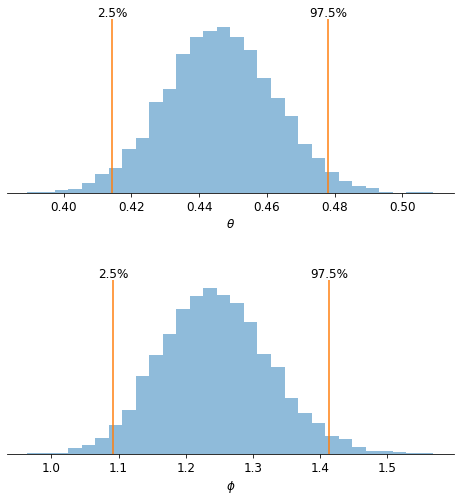

In [4]:
# plotting grid
x = np.linspace(0.36, 0.54, 150)

# draw n random samples from Beta(438,544)
n = 10000
th = beta.rvs(438, 544, size=n)  # rvs comes from `random variates`

# plot 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.5)

# plot histogram
axes[0].hist(th, bins=30, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
th25, th975 = np.percentile(th, [2.5, 97.5])
# draw lines for these
axes[0].axvline(th25, color='C1')
axes[0].axvline(th975, color='C1')
axes[0].text(
    th25,
    axes[0].get_ylim()[1]+15,
    '2.5%',
    horizontalalignment='center'
)
axes[0].text(
    th975,
    axes[0].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[0].set_xlabel(r'$\theta$')

# plot histogram for the transformed variable
phi = (1-th)/th
axes[1].hist(phi, bins=30, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
phi25, phi975 = np.percentile(phi, [2.5, 97.5])
# draw lines for these
axes[1].axvline(phi25, color='C1')
axes[1].axvline(phi975, color='C1')
axes[1].text(
    phi25,
    axes[1].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[1].text(
    phi975,
    axes[1].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[1].set_xlabel(r'$\phi$');